# 13 Measuring Text Similarities
# 13. 1 Simple Text Comparison

Suppose we want to compare 3 simple texts:

* `text1`: _She sells seashells by the seashore._
* `text2`: _"Seashells! The seashells are on sale! By the seashore."_
* `text3`: _Three seashells she sells to John who lives by the lake._

Our goal is to determine whether `text1` is more similar to `text2` or to `text3`. We'll start by assigning the texts to 3 variables.

**Listing 13. 1. Assigning texts to variables**

In [2]:
text1 = 'She sells seashells by the seashore.'
text2 = '"Seashells! The seashells are on sale! By the seashore."'
text3 = 'She sells 3 seashells to John, who lives by the lake.'

Now, we need to quantify the differences between texts. One basic approach is to simply count the words shared between each pair of texts. The approach requires us to split each text into a list of words.

**Listing 13. 2. Splitting texts into words**

In [3]:
words_lists = [text.split() for text in [text1, text2, text3]]
words1, words2, words3 = words_lists

for i, words in enumerate(words_lists, 1):
    print(f"Words in text {i}")
    print(f"{words}\n")

Words in text 1
['She', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 2
['"Seashells!', 'The', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 3
['She', 'sells', '3', 'seashells', 'to', 'John,', 'who', 'lives', 'by', 'the', 'lake.']



Our texts have been split into words. However, an accurate word comparison is not immediately possible, due to present inconsistencies. We can eliminate the capitalization inconsistency by calling the built-in lower string-method. The method converts a string to lowercase. Furthermore, we can strip-out puctutation from a word by calling `word.replace('punctuation', ' ')`, where `punctuation` is set to `'!'` or `'"'`.

**Listing 13. 3. Removing case-sensitivity and punctuation**

In [4]:
def simplify_text(text):
    for punctuation in ['.', ',', '!', '?', '"']:
        text = text.replace(punctuation, '')
    
    return text.lower()

for i, words in enumerate(words_lists, 1):
    for j, word in enumerate(words):
        words[j] = simplify_text(word)
        
    print(f"Words in text {i}")
    print(f"{words}\n") 

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale', 'by', 'the', 'seashore']

Words in text 3
['she', 'sells', '3', 'seashells', 'to', 'john', 'who', 'lives', 'by', 'the', 'lake']



Currently, we're just interested in comparing unique words. We can eliminate all duplicate words by converting each word-list into a set.

**Listing 13. 4. Converting word-lists to sets**

In [5]:
words_sets = [set(words) for words in words_lists]
for i, unique_words in enumerate(words_sets, 1):
    print(f"Unique Words in text {i}")
    print(f"{unique_words}\n") 

Unique Words in text 1
{'seashore', 'sells', 'the', 'she', 'seashells', 'by'}

Unique Words in text 2
{'seashore', 'sale', 'the', 'are', 'seashells', 'on', 'by'}

Unique Words in text 3
{'3', 'sells', 'who', 'lake', 'the', 'she', 'to', 'lives', 'seashells', 'by', 'john'}



Given two Python sets `set_a` and `set_b`, we can extract all overlapping elements by running `set_a & set_b`. Lets leverage the `'&'` operator to count overlapping words between text-pairs `(text1, text2)` and `(text1, text3)`.

**Listing 13. 5. Extracting overlapping words between two texts**

In [6]:
words_set1 = words_sets[0]
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    print(f"Texts 1 and {i} share these {len(shared_words)} words:")
    print(f"{shared_words}\n")

Texts 1 and 2 share these 4 words:
{'seashore', 'seashells', 'the', 'by'}

Texts 1 and 3 share these 5 words:
{'sells', 'the', 'she', 'seashells', 'by'}



Lets count and print all diverging words between text-pairs `(text1, text2)` and `(text1, text3)`. We'll leverage the `^` operator to extract diverging elements between each pair of word-sets.

**Listing 13. 6. Extracting diverging words between two texts**

In [7]:
for i, words_set in enumerate(words_sets[1:], 2):
    diverging_words = words_set1 ^ words_set
    print(f"Texts 1 and {i} don't share these {len(diverging_words)} words:")
    print(f"{diverging_words}\n")

Texts 1 and 2 don't share these 5 words:
{'sells', 'sale', 'she', 'are', 'on'}

Texts 1 and 3 don't share these 7 words:
{'3', 'seashore', 'who', 'lake', 'to', 'lives', 'john'}



Imagine if we combined all overlapping words and all diverging words between 2 texts. The combination shoud contain all the unique words across the 2 texts. This aggregation of all unique words is called a **union**. Lets utilize the `|` operator to count the total words across text-pairs `(text1, text2)` and `(text1, text3)`.

**Listing 13. 7. Extracting the union of words between two texts**

In [8]:
for i, words_set in enumerate(words_sets[1:], 2):
    total_words = words_set1 | words_set
    print(f"Together, texts 1 and {i} contain {len(total_words)} " 
          f"unique words. These words are:\n {total_words}\n")

Together, texts 1 and 2 contain 9 unique words. These words are:
 {'seashore', 'sells', 'sale', 'the', 'she', 'on', 'are', 'seashells', 'by'}

Together, texts 1 and 3 contain 12 unique words. These words are:
 {'3', 'lake', 'to', 'lives', 'who', 'by', 'john', 'seashore', 'sells', 'the', 'she', 'seashells'}



Together, `text1` and `text3` contain 12 unique words. 5 of these words overlap. 7 of these words diverge. Accordingly, both overlap and divergence represent complementary percentages of the total unique word-count across texts. Lets output these percentages for text-pairs `(text1, text2)` and `(text1, text3)`.

**Listing 13. 8. Extracting the percentage of shared words between two texts**

In [9]:
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    diverging_words = words_set1 ^ words_set
    total_words = words_set1 | words_set
    assert len(total_words) == len(shared_words) + len(diverging_words)
    percent_shared = 100 * len(shared_words) / len(total_words)
    percent_diverging = 100 * len(diverging_words) / len(total_words)
    
    print(f"Together, texts 1 and {i} contain {len(total_words)} " 
          f"unique words. \n{percent_shared:.2f}% of these words are "
          f"shared. \n{percent_diverging:.2f}% of these words diverge.\n")

Together, texts 1 and 2 contain 9 unique words. 
44.44% of these words are shared. 
55.56% of these words diverge.

Together, texts 1 and 3 contain 12 unique words. 
41.67% of these words are shared. 
58.33% of these words diverge.



The percentage of shared words is a similarity metric which is called as the **Jaccard similarity**. 

### 13.1.1. Introduction to the Jaccard Similarity
Lets define a function to compute the Jaccard similarity. 

**Listing 13. 9. Computing the Jaccard similarity**

In [10]:
def jaccard_similarity(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split())
                              for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a | word_set_b)
    return num_shared / num_total

for text in [text2, text3]:
    similarity = jaccard_similarity(text1, text)
    print(f"The Jaccard similarity between '{text1}' and '{text}' "
          f"equals {similarity:.4f}." "\n")

The Jaccard similarity between 'She sells seashells by the seashore.' and '"Seashells! The seashells are on sale! By the seashore."' equals 0.4444.

The Jaccard similarity between 'She sells seashells by the seashore.' and 'She sells 3 seashells to John, who lives by the lake.' equals 0.4167.



Our implementation of the Jaccard similarity is functional, but not very efficient. We can replace the union-computation with `len(word_set_a) + len(word_set_b) - num_shared`. This will make our function more efficient.  Lets modify the function, while ensuring that our Jaccard output remains the same.

**Listing 13. 10. Efficiently computing the Jaccard similarity**

In [11]:
def jaccard_similarity_efficient(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split())
                              for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a) + len(word_set_b) -  num_shared
    return num_shared / num_total
    
for text in [text2, text3]:
    similarity = jaccard_similarity_efficient(text1, text)
    assert similarity == jaccard_similarity(text1, text)

We've improved our Jaccard function. Unfortunately, our function still won't scale. The inefficiency is caused by our remaining set-comparison, `word_set_a & word_set_b`. The operation is too slow to execute across thousands of complicated texts. Perhaps we can speed-up the computation by somehow running it using NumPy.

### 13.1.2. Replacing Words with Numeric Values
Can we swap-out words for numbers? Yes! We simply need to iterate over all words in all texts, and assign each unique ith word a value of `i`. The mapping between words and their numeric values can be stored within a Python dictionary.  We'll refer to this dictionary as our **vocabulary**.

**Listing 13. 11. Assigning words to numbers in a vocabulary**

In [12]:
words_set1, words_set2, words_set3 = words_sets
total_words = words_set1 | words_set2 | words_set3
vocabulary = {word : i for i, word in enumerate(total_words)}
value_to_word = {value: word for word, value in vocabulary.items()}
print(f"Our vocabulary contains {len(vocabulary)} words. " 
      f"This vocabulary is:\n{vocabulary}")

Our vocabulary contains 15 words. This vocabulary is:
{'3': 0, 'lake': 1, 'to': 2, 'are': 3, 'lives': 4, 'who': 5, 'by': 6, 'john': 7, 'seashore': 8, 'sells': 9, 'sale': 10, 'the': 11, 'she': 12, 'seashells': 13, 'on': 14}


Given our vocabulary, we can convert any text into a 1-dimensional array of numbers. Mathematically, a 1D numeric array is called **vector**. There are numerous ways of vectorizing text. One basic approach involves creating a vector whose elements are binary. Lets use binary vectorization to convert all texts into NumPy arrays.

**Listing 13. 12. Transforming words into binary vectors**

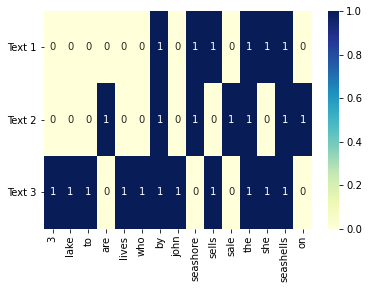

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

vectors = []
for i, words_set in enumerate(words_sets, 1):
    vector = np.array([0] * len(vocabulary))
    for word in words_set:
        vector[vocabulary[word]] = 1
    vectors.append(vector)
    
sns.heatmap(vectors, annot=True,  cmap='YlGnBu', 
            xticklabels=vocabulary.keys(),
yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)
plt.show()

Our binary vector representation allows us to extract shared words numerically. Suppose we wish to know whether the word in column `i` is present both in `text1` and `text2`. If the associated vectors are labeled as `vector1` and `vector2`, then the word is present in both texts if `vector1[i] * vector2[i] == 1`.

**Listing 13. 13. Finding shared words using vector arithmetic**

In [14]:
vector1, vector2 = vectors[:2]
for i in range(len(vocabulary)):
    if vector1[i] * vector2[i]:
        shared_word = value_to_word[i]
        print(f"'{shared_word}' is present in both texts 1 and 2")

'by' is present in both texts 1 and 2
'seashore' is present in both texts 1 and 2
'the' is present in both texts 1 and 2
'seashells' is present in both texts 1 and 2


Our shared word-count is equal to the sum of every non-zero instance of `vector1[i] * vector2[i]`. Meanwhile, the sum of every zero-instance equals 0. Therefore, we can compute the shared-word count merely by summing the pairwise product of `vector1[i]` and `vector2[i]`, across every possible `i`.

**Listing 13. 14. Counting shared words using vector arithmetic**

In [14]:
shared_word_count = sum(vector1[i] * vector2[i] 
                        for i in range(len(vocabulary)))
assert shared_word_count == len(words_set1 & words_set2)

The sum of the pairwise products across all vector indices is called the **dot product**. Given two NumPy arrays, `vector_a` and `vector_b`, we can compute their dot product by running `vector_a.dot(vector_b)`. We can also compute the dot product using the `@` operator, by running `vector_a @ vector_b`.

**Listing 13. 15. Computing a vector dot product using NumPy**

In [15]:
assert vector1.dot(vector2) == shared_word_count
assert vector1 @ vector2 == shared_word_count

The dot product of `vector1` and `vector2` equals the shared word-count between `text1` and `text2`. Suppose instead, we take the dot product of `vector1` with itself. That dot product should equal `len(words_set1)`.

**Listing 13. 16. Counting total words using vector arithmetic**

In [16]:
assert vector1 @ vector1 == len(words_set1)
assert vector2 @ vector2 == len(words_set2)

We are able to compute both shared-word count and total unique word-count using vector dot products. Essentially, we can compute the Jaccard similarity using only vector operations. This vectorized implementation of Jaccard is called the **Tanimoto similarity**. Lets define a `tanimoto_similarity` function.

**Listing 13. 17. Computing text similarity using vector arithmetic**

In [17]:
def tanimoto_similarity(vector_a, vector_b):
    num_shared = vector_a @ vector_b
    num_total = vector_a @ vector_a + vector_b @ vector_b - num_shared
    return num_shared / num_total

for i, text in enumerate([text2, text3], 1):
    similarity = tanimoto_similarity(vector1, vectors[i])
    assert similarity == jaccard_similarity(text1, text)

Our `tanimoto_similarity` function was intended to compare binary vectors. Can it also meaningfully compare non-binary vectors? Lets find out. 

**Listing 13. 18. Computing the similarity of non-binary vectors**

In [18]:
non_binary_vector1 = np.array([5, 3])
non_binary_vector2 = np.array([5, 2])
similarity = tanimoto_similarity(non_binary_vector1, non_binary_vector2)
print(f"The similarity of 2 non-binary vectors is {similarity}")

The similarity of 2 non-binary vectors is 0.96875


The outputted value is nearly equal to 1. Thus, `tanimoto_similarity` has successfully measured the similarity between 2 nearly identical vectors. The function is able to analyze non-binary inputs. 

## 13.2. Vectorizing Texts Using Word Counts


A vector of word-counts is commonly referred to as **term-frequency vector**, or a **TF vector** for short. Word-counts can provide a differentiating signal between texts. For example, suppose we're contrasting 2 texts; A and B. Text A mentions _Duck_ 61 times and _Goose_ twice. Text B mentions _Goose_  71 times and _Duck_ only once. Lets actually compute the TF vectors of A and B, using a 2-element vocabulary `{'duck': 0, 'goose': 1}`. Given the vocabulary, we can convert the texts into TF vectors `[61, 2]` and `[1, 71]`. Below, we'll print the Tanimoto similarity of the 2 vectors.

**Listing 13. 19. Computing TF vector similarity**

In [19]:
similarity = tanimoto_similarity(np.array([61, 2]), np.array([1, 71]))
print(f"The similarity between texts is approximately {similarity:.3f}")

The similarity between texts is approximately 0.024


The TF vector similarity between the texts is very low. Its less than .025. Lets compare this to the binary-vector similarity of the 2 texts. Each text has a binary-vector representation of `[1, 1]`. Thus, the similarity of the 2 identical vectors should equal 1.

**Listing 13. 20. Assessing identical vector similarity**

In [20]:
assert tanimoto_similarity(np.array([1, 1]), np.array([1, 1])) == 1

Replacing binary values with word-counts can greatly impact our similarity output. What will happen if we vectorize `text1`, `text2`, and `text3` based on their word-counts? Lets find out.

**Listing 13. 21. Computing TF vectors from word lists**

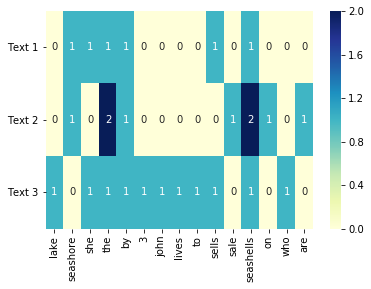

In [21]:
tf_vectors = []
for i, words_list in enumerate(words_lists, 1):
    tf_vector = np.array([0] * len(vocabulary))
    for word in words_list:
        word_index = vocabulary[word]
        # Update the count of each word using its vocabulary index.
        tf_vector[word_index] += 1
        
    tf_vectors.append(tf_vector)
    
    
sns.heatmap(tf_vectors,  cmap='YlGnBu', annot=True, 
            xticklabels=vocabulary.keys(),
yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)
plt.show()

Lets compute TF vector similarity between `text1` and the other 2 texts. We'll also printthe original binary vector similarity, for comparison. Based on our observations, the similarity between `text1` and `text2` should shift, while the similarity between `text1` and `text3` should remain the same.

**Listing 13. 22. Comparing metrics of vector similarity**

In [22]:
tf_vector1 = tf_vectors[0]
binary_vector1 = vectors[0]

for i, tf_vector in enumerate(tf_vectors[1:], 2):
    similarity = tanimoto_similarity(tf_vector1, tf_vector)
    old_similarity = tanimoto_similarity(binary_vector1, vectors[i - 1])
    print(f"The recomputed Tanimoto similarity between texts 1 and {i} is"
          f" {similarity:.4f}.")
    print(f"Previously, that similarity equaled {old_similarity:.4f} " "\n")

The recomputed Tanimoto similarity between texts 1 and 2 is 0.4615.
Previously, that similarity equaled 0.4444 

The recomputed Tanimoto similarity between texts 1 and 3 is 0.4167.
Previously, that similarity equaled 0.4167 



TF vectors yield improved comparisons, because they're sensitive to count-differences between texts. This sensitively is useful. However, it can also be detrimental when comparing texts of different lengths

### 13.2.1. Using Normalization to Improve TF Vector Similarity

Imagine you are testing a very simple search engine. The search engine takes a query as input. It then compares the query to document-titles within a database. Suppose you run a query for "Pepperoni Pizza". The following 2 titles are returned: 

* Title A: "Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!"
* Title B:  "Pepperoni"

Lets check if Title A ranks higher than Title B, relative to query. We'll start by constructing TF vectors from a 2-element vocabulary `{pepperoni: 0, pizza: 1}`.

**Listing 13. 23. Simple search engine vectorization**

In [23]:
query_vector = np.array([1, 1])
title_a_vector = np.array([3, 3])
title_b_vector = np.array([1, 0])

We'll now compare the query to the titles, and sort the titles based on the Tanimoto similarity.

**Listing 13. 24. Ranking titles by query similarity**

In [24]:
titles = ["A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!", 
          "B: Pepperoni"]
title_vectors = [title_a_vector, title_b_vector]
similarities = [tanimoto_similarity(query_vector, title_vector)
                for title_vector in title_vectors]

for index in sorted(range(len(titles)), key=lambda i: similarities[i], 
                    reverse=True):
    title = titles[index]
    similarity = similarities[index]
    print(f"'{title}' has a query similarity of {similarity:.4f}")

'B: Pepperoni' has a query similarity of 0.5000
'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!' has a query similarity of 0.4286


Unfortunately, Title A outranks Title B. This discrepancy in rankings is caused by text-size. Title A has 3x as many words as the query. We need to subdue the influence of text-size on ranked results. One naïve approach is to just divide `title_a_vector` by 3.

**Listing 13. 25. Eliminating size differences through division**

In [25]:
assert np.array_equal(query_vector, title_a_vector / 3)
assert tanimoto_similarity(query_vector, 
                           title_a_vector / 3) == 1

Using simple division, we can manipulate `title_a_vector` to equal `query_vector`. Such manipulation is not possible for `title_b_vector`. Why is this the case? To illustrate the answer, we'll need to plot all 3 vectors in 2D space. We'll visualize the vectors as line segments that stretch from the origin.

**Listing 13. 26. Plotting TF Vectors in 2D Space**

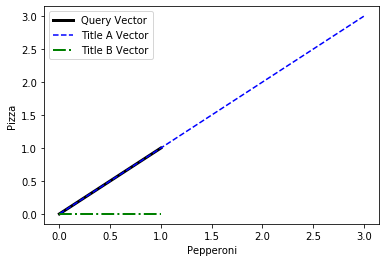

In [26]:
plt.plot([0, query_vector[0]], [0, query_vector[1]], c='k', 
         linewidth=3, label='Query Vector')
plt.plot([0, title_a_vector[0]], [0, title_a_vector[1]], c='b', 
          linestyle='--', label='Title A Vector')
plt.plot([0, title_b_vector[0]], [0, title_b_vector[1]], c='g', 
         linewidth=2, linestyle='-.', label='Title B Vector')
plt.xlabel('Pepperoni')
plt.ylabel('Pizza')
plt.legend()
plt.show()

Within our plot, `title_a_vector` and `query_vector` point in the same direction.  Shrinking `title_a_vector` will force the 2 lines to be exactly identical. Meanwhile, `title_b_vector` and `query_vector` point in different directions. There is no way to make these vectors overlap. Shrinking or lengthing `title_b_vector` will not yield alignment with the other 2 line segments.

We've gained some insight by representing our vectors as line segments. Every vector has a geometrical length. That length is called the **magnitude**. Given vector `v`, we can measure the magnitude naively, by measuring the Euclidean distance between `v` and the origin. We can also find the magnitude using NumPy, by running `np.linalg.norm(v)`. Finally, we can compute the magnitude using the Pythagorean theorem. According the that theorem, the magnitude of `v` equals `(v @ v) ** 0.5`.

**Listing 13. 27. Computing vector magnitude**

In [27]:
from scipy.spatial.distance import euclidean
from numpy.linalg import norm

vector_names = ['Query Vector', 'Title A Vector', 'Title B Vector']
tf_search_vectors = [query_vector, title_a_vector, title_b_vector]
origin = np.array([0, 0])
for name, tf_vector in zip(vector_names, tf_search_vectors):
    magnitude = euclidean(tf_vector, origin)
    assert magnitude == norm(tf_vector)
    assert magnitude == (tf_vector @ tf_vector) ** 0.5
    print(f"{name}'s magnitude is approximately {magnitude:.4f}")

magnitude_ratio = norm(title_a_vector) / norm(query_vector)
print(f"\nVector A is {magnitude_ratio:.0f}x as long as Query Vector")

Query Vector's magnitude is approximately 1.4142
Title A Vector's magnitude is approximately 4.2426
Title B Vector's magnitude is approximately 1.0000

Vector A is 3x as long as Query Vector


The magnitude of `title_vector_b` is equal to exactly 1. A vector with a magnitude of 1 is referred to as a **unit vector**. One benefit of unit vectors is that they are easy to compare. Since unit-vectors share an equal magnitude, it doesn't play a role in their similarity. 

Dividing any vector by its magnitude will transform that magnitude to 1. That division by the magnitude is called **normalization**.  Running `v / norm(v)` will return a **normalized vector** with a magnitude of 1.  We'll now normalize our vectors and a generate a unit-vector plot. Within the plot, 2 of the vectors should be totally identical.

**Listing 13. 28. Plotting normalized vectors**

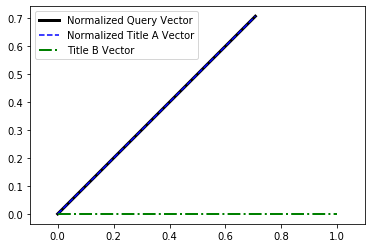

In [28]:
unit_query_vector = query_vector / norm(query_vector)
unit_title_a_vector = title_a_vector / norm(title_a_vector)
assert np.allclose(unit_query_vector, unit_title_a_vector)
unit_title_b_vector = title_b_vector

plt.plot([0, unit_query_vector[0]], [0, unit_query_vector[1]], c='k', 
         linewidth=3, label='Normalized Query Vector')
plt.plot([0, unit_title_a_vector[0]], [0, unit_title_a_vector[1]], c='b', 
          linestyle='--', label='Normalized Title A Vector')
plt.plot([0, unit_title_b_vector[0]], [0, unit_title_b_vector[1]], c='g', 
         linewidth=2, linestyle='-.', label='Title B Vector')

plt.axis('equal')
plt.legend()
plt.show()

The normalized query vector and the normalized Title B vector are now indistinguishable. Meanwhile, the location of the Title B vector diverges from the query vector, because the two segments point in different directions. As a consequence, Title A should now outrank Title B, relative to the query.

**Listing 13. 29. Ranking titles by unit-vector similarity**

In [29]:
unit_title_vectors = [unit_title_a_vector, unit_title_b_vector]
similarities = [tanimoto_similarity(unit_query_vector, unit_title_vector)
                for unit_title_vector in unit_title_vectors]

for index in sorted(range(len(titles)), key=lambda i: similarities[i], 
                    reverse=True):
    title = titles[index]
    similarity = similarities[index]
    print(f"'{title}' has a normalized query similarity of {similarity:.4f}")

'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!' has a normalized query similarity of 1.0000
'B: Pepperoni' has a normalized query similarity of 0.5469


Vector normalization has fixed a flaw in our search engine. The search engine is no longer overly sensitive to title-length. Also, in the process, we have inadvertently made our Tanimoto computation more efficient. Given two normalized unit vectors `u1` and `u2`, their Tanimoto similarity reduces to `u1 @ u2 / (2 - u1 @ u2)`. Taking the dot product of each vector with itself is no longer necessary. The only required vector computation is `u1 @ u2`. 

**Listing 13. 30. Computing a unit-vector Tanimoto similarity**

In [30]:
def normalized_tanimoto(u1, u2):
    dot_product = u1 @ u2
    return dot_product / (2 - dot_product)

for unit_title_vector in unit_title_vectors[1:]:
    similarity = normalized_tanimoto(unit_query_vector, unit_title_vector)
    assert similarity == tanimoto_similarity(unit_query_vector, 
                                             unit_title_vector)

The dot product of 2 unit-vectors is a very special value. It can easily be converted into the angle between the vectors, and also into the spatial distance between them. 

#### Utilizing Unit-Vector Dot Products to Convert Between Relevance Metrics
The unit-vector dot product unites multiple types of comparison metrics. We've just seen how `tanimoto_similarity(u1, u2)` is a direct function of `u1 @ u2`. As it turns out, the Euclidian distance between unit-vectors is also a function of `u1 @ u2`. Its not difficult prove that `euclidian(u1, u2)` equals `+(2 - 2* u1 @ u2) ** 0.5+`. Additionally, `u1 @ u2` equals the cosine of the angle between the unit-vectors. Thus `u1 @ u2` is commonly referred to as the **cosine similarity**.

The code below illustrates how easy it is to convert between the Tanimoto similarity, the cosine similarity, and the Euclidean distance.

**Listing 13. 31. Converting between unit-vector metrics**

In [31]:
unit_vector_names = ['Normalized Title A vector', 'Title B Vector']
u1 = unit_query_vector

for unit_vector_name, u2 in zip(unit_vector_names, unit_title_vectors):
    similarity = normalized_tanimoto(u1, u2)
    cosine_similarity  = 2 * similarity / (1 + similarity)
    assert cosine_similarity == u1 @ u2
    angle = np.arccos(cosine_similarity)
    euclidean_distance = (2 - 2 * cosine_similarity) ** 0.5
    assert round(euclidean_distance, 10) == round(euclidean(u1, u2), 10)
    measurements = {'Tanimoto similarity': similarity,
                    'cosine similarity': cosine_similarity,
                    'Euclidean distance': euclidean_distance,
                    'angle': np.degrees(angle)}
    
    print("We are comparing Normalized Query Vector and "
           f"{unit_vector_name}")
    for measurement_type, value in measurements.items():
        output = f"The {measurement_type} between vectors is {value:.4f}"
        if measurement_type == 'angle':
            output += ' degrees\n'
        
        print(output)

We are comparing Normalized Query Vector and Normalized Title A vector
The Tanimoto similarity between vectors is 1.0000
The cosine similarity between vectors is 1.0000
The Euclidean distance between vectors is 0.0000
The angle between vectors is 0.0000 degrees

We are comparing Normalized Query Vector and Title B Vector
The Tanimoto similarity between vectors is 0.5469
The cosine similarity between vectors is 0.7071
The Euclidean distance between vectors is 0.7654
The angle between vectors is 45.0000 degrees



Vector normalization allows us to swap between multiple comparison metrics. Other benefits of normalization include a more efficient computation of the similarity between every pair of vectors. This called the **all-by-all similarity**.  The all-by-all similarity can be elegantly computed using **matrix multiplication**. In mathematics, matrix multiplication generalizes the dot product from 1-dimensional vectors to 2-dimensional arrays. The generalized dot product leads to the efficient computation of similarities across all pairs of texts.

## 13.3. Matrix Multiplication for Efficient Similarity Calculation

When analyzing our _seashell_-centric texts, we compared each text-pair individually. What if instead, we visualized all pairwise similarities? The rows and columns of the table would correspond to individual texts. The table would provide us with a bird's-eye view of all the relationship between texts. We would finally learn whether `text2` is more similar to `text1` or to `text3`.

Lets generate a table of normalized Tanimoto similarities.

**Listing 13. 32. Computing a table of normalized Tanimoto similarities**

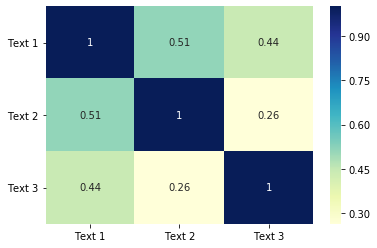

In [32]:
num_texts = len(tf_vectors)
similarities = np.array([[0.0] * num_texts for _ in range(num_texts)])
similarities = np.zeros((num_texts, num_texts))
unit_vectors = np.array([vector / norm(vector) for vector in tf_vectors])
for i, vector_a in enumerate(unit_vectors):
    for j, vector_b in enumerate(unit_vectors):
        similarities[i][j] = normalized_tanimoto(vector_a, vector_b)
        
labels = ['Text 1', 'Text 2', 'Text 3']
sns.heatmap(similarities,  cmap='YlGnBu', annot=True, 
            xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=0)
plt.show()

Looking at the table is informative. We can immediately tell which text-pairs share the highest similarity, and which texts share the lowest similarity. However, our table computation relied on inefficient code. We can purge our code of these operations using matrix multiplication. However, we'll first need to introduce basic matrix operations.

### 1.3.1. Basic Matrix Operations

A **matrix** is the extention of a 1-dimensional vector to 2 dimensions. In other words, a matrix is just table of numbers. Since matrices are tables, they can be analyzed using Pandas. Conversely, numeric tables can be handled using 2D NumPy arrays. Both matrix representations are valid. In fact, Pandas DataFrames and NumPy arrays can sometimes be used interchangeably. This is because DataFrames and arrays share certain attributes.

**Listing 13. 33. Comparing Pandas and NumPy matrix attributes**

In [33]:
import pandas as pd

matrices = [unit_vectors, pd.DataFrame(unit_vectors)]
matrix_types = ['Pandas DataFrame', '2D NumPy array']

for matrix_type, matrix in zip(matrix_types, matrices):
    row_count, column_count = matrix.shape
    print(f"Our {matrix_type} contains "
          f"{row_count} rows and {column_count} columns")
    assert (column_count, row_count) == matrix.T.shape

Our Pandas DataFrame contains 3 rows and 15 columns
Our 2D NumPy array contains 3 rows and 15 columns


Pandas and NumPy table structures are similar. Nonetheless, there are certain benefits to storing matrices within 2D NumPy arrays. One immediate benefit is NumPy's integration of Python's built-in arithmetic operators.

#### NumPy Matrix Arithmetic Operations

Doubling the values of a matrix is very easy to do in NumPy. For example, we can double our `similarities` matrix by running `2 * similarities`. We can also add `similarities` directly to itself, by running `similarities + similarities`. Of course, the 2 arithmetic outputs will equal. Meanwhile, running `similarities - similarities` will return a matrix of zeros. Furthermore, running `similarities - similarities - 1` will subtract 1 from each of the zeros. 

**Listing 13. 34. NumPy array addition and subtraction**

In [34]:
double_similarites = 2 * similarities
np.array_equal(double_similarites, similarities + similarities)
zero_matrix = similarities - similarities
negative_1_matrix = similarities - similarities - 1

for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        assert double_similarites[i][j] == 2 * similarities[i][j]
        assert zero_matrix[i][j] == 0
        assert negative_1_matrix[i][j] == -1

In that same manner, we can multiply and divide NumPy arrays. Running `similarities / similarities` will divide each similarity by itself, thus returning a matrix of ones. Meanwhile, running `similarities * similarities` will return a matrix of squared similarity values.

**Listing 13. 35. NumPy array multiplication and division**

In [35]:
squared_similarities = similarities * similarities
assert np.array_equal(squared_similarities, similarities ** 2)
ones_matrix = similarities / similarities

for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        assert squared_similarities[i][j] == similarities[i][j] ** 2
        assert ones_matrix[i][j] == 1

Matrix arithmetic lets us conveniently transition between similarity-matrix types.  For instance, we can convert our Tanimoto matrix into a cosine similarity matrix, simply by running `2 * similarities / (1 + similarities)`.

**Listing 13. 36. Converting between matrix similarity-types**

In [36]:
cosine_similarities  = 2 * similarities / (1 + similarities)
for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        cosine_sim = unit_vectors[i] @ unit_vectors[j]
        assert round(cosine_similarities[i][j], 
                     15) == round(cosine_sim, 15)

NumPy 2D arrays confer additional benefits over Pandas. Accessing rows and columns by index is much more straightforward in NumPy. 

#### NumPy Matrix Row and Column Operations

Given any 2D `matrix` array, we can access the row at index `i` by running `matrix[i]`. Likewise, we can access the column at index `j` by running `matrix[:,j]`.  

Lets use NumPy indexing to print the second row and column of both `unit_vectors` and `similarities`.

**Listing 13. 37. Accessing NumPy matrix rows and columns**

In [37]:
for name, matrix in [('Similarities', similarities),
                     ('Unit Vectors', unit_vectors)]:
    print(f"Accessing rows and columns in the {name} Matrix.")
    row, column = matrix[0], matrix[:,0]
    print(f"Row at index 1 is:\n{row}")
    print(f"\nColumn at index 1 is:\n{column}\n")

Accessing rows and columns in the Similarities Matrix.
Row at index 1 is:
[1.         0.51442439 0.44452044]

Column at index 1 is:
[1.         0.51442439 0.44452044]

Accessing rows and columns in the Unit Vectors Matrix.
Row at index 1 is:
[0.         0.40824829 0.40824829 0.40824829 0.40824829 0.
 0.         0.         0.         0.40824829 0.         0.40824829
 0.         0.         0.        ]

Column at index 1 is:
[0.         0.         0.30151134]



All printed rows and columns are 1-dimensional NumPy arrays. Given two arrays, we can compute their dot product, but only if the array lengths are the same. In our output, both `similarities[0].size` and `unit_vectors[:,0].size` are equal to 3. Hence, we can take the dot product between the first row of `similarities` and the first column of `unit_vectors`.

**Listing 13. 38. Computing the dot product between a row and column**

In [38]:
num_rows = similarities.shape[0]
num_columns = unit_vectors.shape[1]
for i in range(num_rows):
    for j in range(num_columns):
        row = similarities[i]
        column = unit_vectors[:,j]
        dot_product = row @ column
        print(f"The dot product between row {i} column {j} is: "
              f"{dot_product:.4f}")

The dot product between row 0 column 0 is: 0.1340
The dot product between row 0 column 1 is: 0.5509
The dot product between row 0 column 2 is: 0.5423
The dot product between row 0 column 3 is: 0.8276
The dot product between row 0 column 4 is: 0.6850
The dot product between row 0 column 5 is: 0.1340
The dot product between row 0 column 6 is: 0.1340
The dot product between row 0 column 7 is: 0.1340
The dot product between row 0 column 8 is: 0.1340
The dot product between row 0 column 9 is: 0.5423
The dot product between row 0 column 10 is: 0.1427
The dot product between row 0 column 11 is: 0.8276
The dot product between row 0 column 12 is: 0.1427
The dot product between row 0 column 13 is: 0.1340
The dot product between row 0 column 14 is: 0.1427
The dot product between row 1 column 0 is: 0.0797
The dot product between row 1 column 1 is: 0.4874
The dot product between row 1 column 2 is: 0.2897
The dot product between row 1 column 3 is: 0.8444
The dot product between row 1 column 4 is: 0.

We've generated 45 dot products, one for each row, column combination.  These outputs can be stored more concisely in a matrix called `dot_products`, where `dot_products[i][j]` is equal to `similarities[i] @ unit_vectors[:,j]`.

**Listing 13. 40. Storing all-by-all dot products in a matrix**

In [39]:
dot_products = np.zeros((num_rows, num_columns))
for i in range(num_rows):
    for j in range(num_columns):
        dot_products[i][j] = similarities[i] @ unit_vectors[:,j]

print(dot_products)

[[0.13402795 0.55092394 0.54227624 0.82762755 0.6849519  0.13402795
  0.13402795 0.13402795 0.13402795 0.54227624 0.14267565 0.82762755
  0.14267565 0.13402795 0.14267565]
 [0.07969524 0.48736297 0.28970812 0.84440831 0.56705821 0.07969524
  0.07969524 0.07969524 0.07969524 0.28970812 0.2773501  0.84440831
  0.2773501  0.07969524 0.2773501 ]
 [0.30151134 0.25478367 0.48298605 0.62960397 0.55629501 0.30151134
  0.30151134 0.30151134 0.30151134 0.48298605 0.07330896 0.62960397
  0.07330896 0.30151134 0.07330896]]


The operation we've just executed is called a **matrix product**.  Given two matrices `matrix_a` and `matrix_b`, we can compute their product by calculating `matrix_c`, where `matrix_c[i][j]` is equal to `matrix_a[i] @ matrix_b[:,j]`.

#### NumPy Matrix Products

Conveniently, NumPy's product operator `@` can be applied to 2D matrices as well as to 1D arrays. If `matrix_a` and `matrix_b` are both NumPy arrays, then `matrix_c` is will equal `matrix_a @ matrix_b`.

**Listing 13. 41. Computing a matrix product using NumPy**

In [40]:
matrix_product = similarities @ unit_vectors
assert np.allclose(matrix_product, dot_products)

Suppose we were to flip our input matrices, and run `unit_vectors @ similarities`? What will happen? NumPy will throw an error! The computation takes the vector dot product between rows in `unit_vectors` and columns in `similarities`. However, these rows and columns have different lengths. Therefore, the computation is not possible.


**Listing 13. 42. Computing an erroneous matrix product**

In [41]:
try:
    matrix_product = unit_vectors @ similarities
except:
    print("We can't compute the matrix product")

We can't compute the matrix product


In mathematics, the words _product_ and _multiplication_ are often interchangeable. Thus, computing the matrix product is commonly called **matrix multiplication**. That name is so ubiquitous that NumPy includes an `np.matmul` function. The output of `np.matmul(matrix_a, matrix_b)` is identical to `matrix_a @ matrix_b`.

**Listing 13. 43. Running matrix multiplication using `matmul`**

In [42]:
matrix_product = np.matmul(similarities, unit_vectors)
assert np.array_equal(matrix_product,
                      similarities @ unit_vectors)

Lets compare the matrix-product speed between NumPy and regular Python. We’ll generate 100 matrices, composed entirely of ones. We’ll multiply every matrix by itself, using NumPy and also Python for-loops. We will also time each multiplication using Python’s built-in `time` module. Finally, we’ll plot matrix size vs running-time for our for-loop and our NumPy multiplications.

**Listing 13. 44. Comparing matrix product running-times**

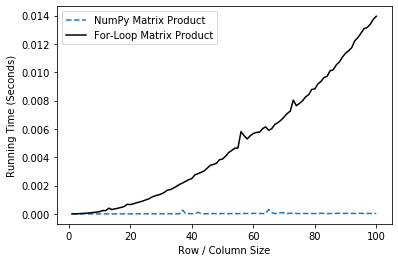

In [43]:
import time

numpy_run_times = []
for_loop_run_times = []

matrix_sizes = range(1, 101)
for size in matrix_sizes:
    matrix = np.ones((size, size))
    
    start_time = time.time()
    matrix @ matrix
    numpy_run_times.append(time.time() - start_time)
    
    start_time = time.time()
    for i in range(size):
        for j in range(size):
            matrix[i] @ matrix[:,j]
            
    for_loop_run_times.append(time.time() - start_time)
    
plt.plot(matrix_sizes, numpy_run_times, 
         label='NumPy Matrix Product', linestyle='--')
plt.plot(matrix_sizes, for_loop_run_times, 
         label='For-Loop Matrix Product', color='k')
plt.xlabel('Row / Column Size')
plt.ylabel('Running Time (Seconds)')
plt.legend()
plt.show()

When it comes to matrix multiplication, NumPy greatly outperforms basic Python.  NumPy matrix product code is more efficient to run, and also to write. We will now use NumPy to compute our all-by-all text similarities with maximum efficiency.

### 13.3.2. Computing All-By-All Matrix Similarities

Running, `unit_vectors @ unit_vectors.T` returns a matrix of all-by-cosine similarities. The matrix should equal our previously computed `cosine_similarites` array. Lets confirm.

**Listing 13. 45. Obtaining cosines from a matrix product**

In [44]:
cosine_matrix = unit_vectors @ unit_vectors.T
assert np.allclose(cosine_matrix, cosine_similarities)

Each element in `cosine_matrix` equals the cosine of the the angle between 2 vectorized texts. That cosine can be transformed into a Tanimoto value, which generally reflects word overlap and divergence between texts. Using NumPy arithmetic, we can convert `cosine_matrix` into a Tanimoto similarity matrix, by running `cosine_matrix / (2 - cosine_matrix)`.

**Listing 13. 46. Converting cosines to a Tanimoto matrix**

In [45]:
tanimoto_matrix = cosine_matrix / (2 - cosine_matrix)
assert np.allclose(tanimoto_matrix, similarities)

We've compute all the Tanimoto similarities in just 2 lines of code. We can also compute these similarities by inputting `unit_vectors` and `unit_vectors.T` directly into our `normalized_tanimoto` function.

**Listing 13. 47. Inputting matrices into `normalized_tanimoto`**

In [46]:
output = normalized_tanimoto(unit_vectors, unit_vectors.T)
assert np.array_equal(output, tanimoto_matrix)

== 13.4. Computational Limits of Matrix Multiplication

Matrix multiplication speed is determined by matrix-size. NumPy may optimize for speed, but even NumPy has its limits. These limits become obvious when we compute real-world text-matrix products.

Lets assume that 30 novels require a shared vocabulary containing 30,000 words. Furthermore, lets assume we take all-by-all similarity across the 30 books, How long will it take to compute these similarities? Lets find out! We'll create a 30-book by 50,000-word `book_matrix`. All rows within the matrix will be normalized. Afterwards, we'll measure the running-time of `normalized_tanimoto(book_matrix, book_matrix.T)`.

**Listing 13. 48. Timing an all-by-all comparison of 30 novels**

In [47]:
vocabulary_size = 50000
normalized_vector = [1 / vocabulary_size] * vocabulary_size
book_count = 30

def measure_run_time(book_count):
    book_matrix = np.array([normalized_vector] * book_count)
    start_time = time.time()
    normalized_tanimoto(book_matrix, book_matrix.T)
    return time.time() - start_time

run_time = measure_run_time(book_count)
print(f"It took {run_time:.4f} seconds to compute the similarities across a "
      f"{book_count}-book by {vocabulary_size}-word matrix")

It took 0.0048 seconds to compute the similarities across a 30-book by 50000-word matrix


Will the running-time stay reasonable as the number of analyzed books continues to rise? Lets check below. We'll plot the running-times across multiple book-counts. The counts will range from 30 to nearly 1,000. For consistency's sake, we'll keep the vocabulary-size at 50,000.

**Listing 13. 49. Plotting book-counts vs running-times**

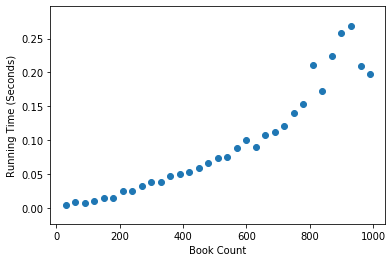

In [48]:
book_counts = range(30, 1000, 30)
run_times = [measure_run_time(book_count) 
             for book_count in book_counts]    
plt.scatter(book_counts, run_times)
plt.xlabel('Book Count')
plt.ylabel('Running Time (Seconds)')
plt.show()

The similarity running-time rises quadratically with book-counts. Our plotted curve takes on a parabolic shape defined by `y = n * (x ** 2)`.

**Listing 13. 50. Modeling running-times using a quadratic curve**

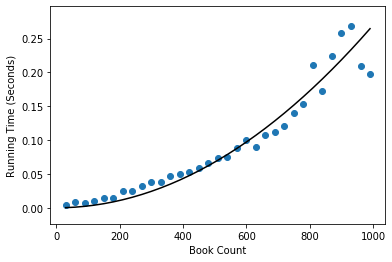

In [49]:
def y(x): return (0.27 / (1000 ** 2)) * (x ** 2)
plt.scatter(book_counts, run_times)
plt.plot(book_counts, y(np.array(book_counts)), c='k')
plt.xlabel('Book Count')
plt.ylabel('Running Time (Seconds)')
plt.show()

Our plotted equation overlaps with the measured times. Thusly, we can use the equation the to predict the speed of larger book comparisons. Lets see how long it will take to measure the similarity across 300,000 books.

**Listing 13. 51. Predicting the running-time for 300K books**

In [50]:
book_count = 300000
run_time = y(book_count) / 3600
print(f"It will take {run_time} hours to compute all-by-all similarities "
      f"from a {book_count}-book by {vocabulary_size}-word matrix")

It will take 6.75 hours to compute all-by-all similarities from a 300000-book by 50000-word matrix


It will take nearly 7 hours to compare 300,000 books. This delay in time is not acceptable, especially in industrial NLP systems, which are designed to process millions of texts in mere seconds. We need to somehow reduce the running-time. One approach is to reduce the matrix-size.